# Applying moving average and exponential average indicators to stock market data

## Import Library

In [12]:
!pip install ta

In [13]:
import math
import ta
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Load Data

In [14]:
data = pdr.get_data_yahoo('TSLA', start='2017-08-01', end='2023-08-01')
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-08-01   21.533333   21.629999   21.075333   21.304667   21.304667   
2017-08-02   21.262667   21.808001   20.747999   21.726000   21.726000   
2017-08-03   23.021999   23.333332   22.876667   23.139334   23.139334   
2017-08-04   23.133333   23.818001   22.886667   23.794001   23.794001   
2017-08-07   23.823334   23.965334   23.516666   23.677999   23.677999   
...                ...         ...         ...         ...         ...   
2023-07-25  272.380005  272.899994  265.000000  265.279999  265.279999   
2023-07-26  263.250000  268.040009  261.750000  264.350006  264.350006   
2023-07-27  268.309998  269.130005  255.300003  255.710007  255.710007   
2023-07-28  259.859985  267.250000  258.230011  266.440002  266.440002   
2023-07-31  267.480011  269.079987  263.779

In [15]:
data.shape

(1509, 6)

## Create a function for calculation Moving Average(MA)

In [16]:
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

## Create a function for calculation Exponential Moving Average(EMA)

In [17]:
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()

In [18]:
df=data

## Create two new columns for storing the 20 day and 50 day MA

In [19]:
df['MA10']=MA(df,10)
df['MA20']=MA(df,20)

## Create two new columns for storing the 20 day and 50 day MA

In [20]:
df['EMA21']=EMA(df,21)
df['EMA50']=EMA(df,50)

## Get the buy and sell signals

In [21]:
df['Signal']=np.where(df['MA10']>df['MA20'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)

## Get the buy and sell signals

In [22]:
df['Signal']=np.where(df['EMA21']>df['EMA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)

## Show the Close price with the MA ,WMA,EMA and Buy and Sell signals

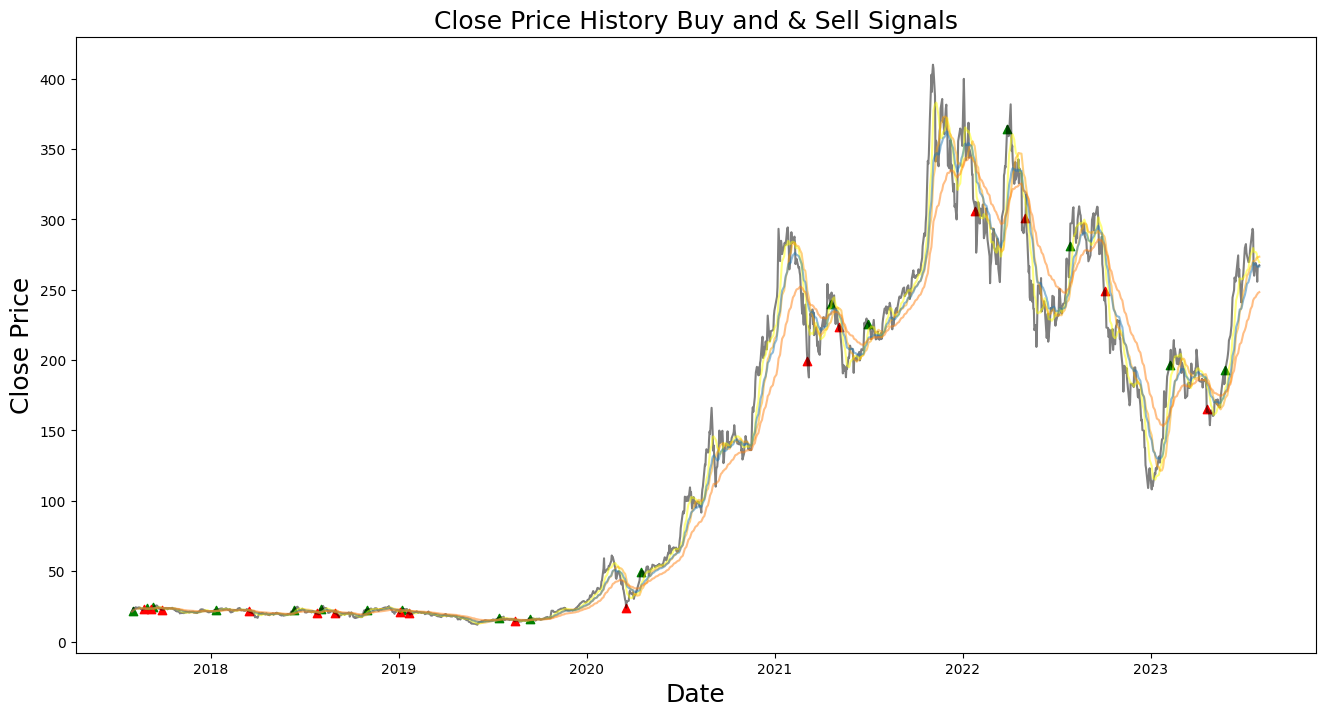

In [23]:
plt.figure(figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], label='Close', alpha=0.5, color='black')
plt.plot(df['MA10'], alpha=0.5 , label='MA10', color='yellow')
plt.plot(df['MA20'], alpha=0.5 , label='MA20', color='orange')
plt.plot(df['EMA21'], alpha=0.5 , label='EMA21')
plt.plot(df['EMA50'], alpha=0.5 , label='EMA50')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()